In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_data = pd.merge(ride_data, city_data, on="city", how="outer")

# Display the data table for preview
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [3]:
rural = pyber_data.loc[pyber_data["type"] == "Rural", :]
rural_group = rural.groupby("city")
rural_ttl_rides = rural_group["ride_id"].count()
rural_x = rural_ttl_rides.tolist()
rural_fare_avg = rural_group["fare"].mean()
rural_y = rural_fare_avg.tolist()
rural_driver_count = rural_group["driver_count"].mean()

suburban = pyber_data.loc[pyber_data["type"] == "Suburban", :]
suburban_group = suburban.groupby("city")
suburban_ttl_rides = suburban_group["ride_id"].count()
suburban_x = suburban_ttl_rides.tolist()
suburban_fare_avg = suburban_group["fare"].mean()
suburban_y = suburban_fare_avg.tolist()
suburban_driver_count = suburban_group["driver_count"].mean()

urban = pyber_data.loc[pyber_data["type"] == "Urban", :]
urban_group = urban.groupby("city")
urban_ttl_rides = urban_group["ride_id"].count()
urban_x = urban_ttl_rides.tolist()
urban_fare_avg = urban_group["fare"].mean()
urban_y = urban_fare_avg.tolist()
urban_driver_count = urban_group["driver_count"].mean()



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

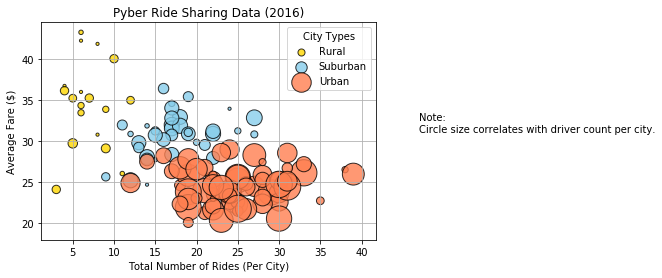

<Figure size 432x288 with 0 Axes>

In [17]:
# Obtain the x and y coordinates for each of the three city types


# Build the scatter plots for each city types
plt.scatter(rural_x, rural_y, marker="o", facecolors="gold", edgecolors="black", s=rural_driver_count*10, alpha=0.8, label='Rural')
plt.scatter(suburban_x, suburban_y, marker="o", facecolors="skyblue", edgecolors="black", s=suburban_driver_count*10, alpha=0.8, label='Suburban')
plt.scatter(urban_x, urban_y, marker="o", facecolors="coral", edgecolors="black", s=urban_driver_count*10, alpha=0.8, label='Urban')

# Incorporate the other graph properties
# Create a legend
plt.legend(title = "City Types")
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()


# Incorporate a text label regarding circle size
plt.figtext(1, 0.5,"Note:\nCircle size correlates with driver count per city.", fontsize=10)
plt.show()
# Save Figure
plt.savefig("Images/pyber_scatter.png")

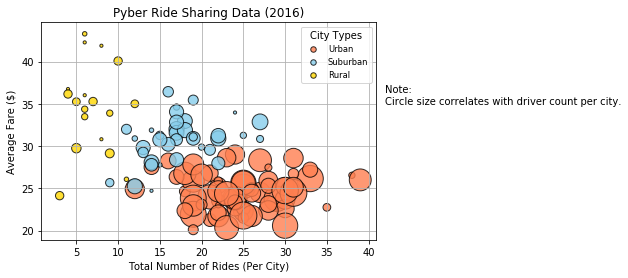

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

6.81149297498341 30.46387206273222 62.72463496228436

63538.64


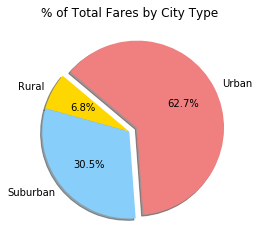

In [10]:
# Calculate Type Percents
rural_fare_count = rural["fare"].sum()
suburban_fare_count = suburban["fare"].sum()
urban_fare_count = urban["fare"].sum()
total_count = rural_fare_count + suburban_fare_count + urban_fare_count
rural_pct = (rural_fare_count/total_count)*100
suburban_pct = (suburban_fare_count/total_count)*100
urban_pct = (urban_fare_count/total_count)*100
print(rural_pct, suburban_pct, urban_pct)
print()
print(total_count)

# Build Pie Chart
labels1 = ["Rural", "Suburban", "Urban"]
sizes1 = [rural_fare_count, suburban_fare_count, urban_fare_count]
colors1 = ["gold", "lightskyblue", "lightcoral"]
explode1 = (0, 0, 0.1)

plt.pie(sizes1, explode=explode1, labels=labels1, colors=colors1,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")


# Save Figure
plt.savefig("Images/pyber_fares.png")

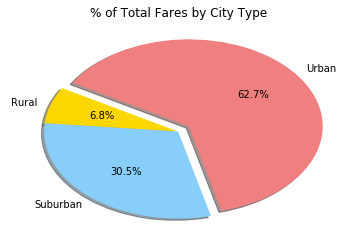

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

125 625 1625

2375


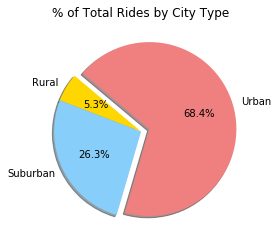

In [11]:
# Calculate Ride Percents
rural_count = rural["ride_id"].nunique()
suburban_count = suburban["ride_id"].nunique()
urban_count = urban["ride_id"].nunique()
total_count = rural_count + suburban_count + urban_count
rural_pct = (rural_count/total_count)*100
suburban_pct = (suburban_count/total_count)*100
urban_pct = (urban_count/total_count)*100
print(rural_count, suburban_count, urban_count)
print()
print(total_count)

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
sizes = [rural_count, suburban_count, urban_count]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("Images/pyber_rides.png")

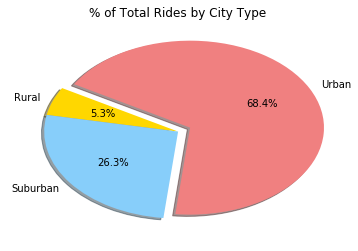

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

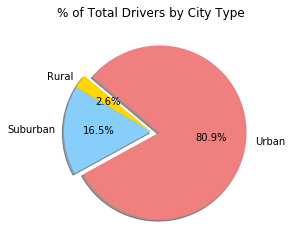

In [12]:
# Calculate Driver Percents
rural_driver_count_list = rural_driver_count.tolist()
suburban_driver_count_list = suburban_driver_count.tolist()
urban_driver_count_list = urban_driver_count.tolist()
rural_drivers = sum(rural_driver_count_list)
suburban_drivers = sum(suburban_driver_count_list)
urban_drivers = sum(urban_driver_count_list)

# Build Pie Charts
labels2 = ["Rural", "Suburban", "Urban"]
sizes2 = [rural_drivers, suburban_drivers, urban_drivers]
colors2 = ["gold", "lightskyblue", "lightcoral"]
explode2 = (0, 0, 0.1)

plt.pie(sizes2, explode=explode2, labels=labels2, colors=colors2,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Images/pyber_drivers.png")

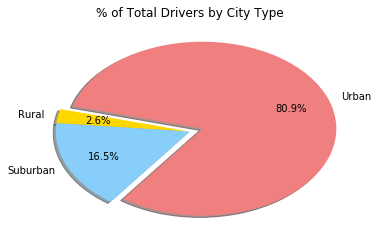

In [6]:
# Show Figure
plt.show()